## Table of content
    I. Import some libraries
        1. Data description
        2. Choice of the DataFrame
        3. Load the data into the dataFrame
    II. Exploratory Data Analysis
    III. Define our study problem
    IV. Determine the type of Machine Learning
        1. Look at the distribution of Target variable
        2. Data preparation
     V. Basic Data Exploration
     VI. Basic Data Exploration Results
        1. Remove useless columns from the dataset 
        2. Visual Exploratory Data Analysis
     VII. Feature Selection
        1. Relationship exploration: Continuous Vs Continuous -- Scatter Charts
        2. Correlation matrix using a heatmap
        3. Statistical Feature Selection (Continuous Vs Continuous) using Correlation value 
        4. Final selected Continuous columns
     VIII. Choose and Train a Machine Learning Model
        1. Linear Regression Model
        2. Random Forest
        3. Decision Tree Regression
        4. Support Vector Regression (SVR)
        5. Complete Comparison of the four models
        6. Visualize actual vs predicted values with Residual plot
        6. Choice of the best Model
        
     

  ## Reference
     

## I. Import some libraries
    •	Pandas for manipulating and analyzing tabular data
    •	NumPy for performing numerical and statistical calculations
    •	Matplotlib.pyplot and Seaborn for data visualization
    •	warnings to avoid being distracted by irrelevant messages and focus on your main task
    

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

https://catalog.data.gov/dataset/employee-salaries-2023

## 1. Data description

Dataset contains the following columns:

- **Department**: Department code for the department to which the employee is assigned.
- **Department_Name**: Name of the County Department to which the employee is assigned.
- **Division**: Name of the division within the County department to which the employee is assigned.
- **Gender**:	Gender
- **Base_Salary**: Annual base salary for the employee at the end of the calendar year.
- **Overtime_Pay**: Overtime pay the employee received for hours worked beyond the employee’s normally scheduled workday or workweek. 
- **Longevity_Pay**: Longevity pay the employee received for the length of service in County employment at the end of the calendar year.
- **Grade**: Assigned grade for the employee at the end of the calendar year.


## 2. Choice of the DataFrame
The dataset reflects the annual salary information including gross pay and overtime pay for all active, permanent employees of Montgomery County, MD paid in calendar year 2023.

The aim of our study is to develop a predictive model to predict the total annual salary of employees.

## 3. Load the data into the dataFrame

In [3]:
df = pd.read_csv("Employee_Salaries_-_2023.csv")

## III. Exploratory Data Analysis 
    We are going to explore the data to have insights into the data

In [4]:
# Display the 5 first rows
df.head(5)

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.000,0.00,0.0,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.360,0.00,0.0,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.000,0.00,0.0,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.694,0.00,2490.0,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.000,456.68,6257.7,16


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department       10291 non-null  object 
 1   Department_Name  10291 non-null  object 
 2   Division         10291 non-null  object 
 3   Gender           10291 non-null  object 
 4   Base_Salary      10291 non-null  float64
 5   Overtime_Pay     10291 non-null  float64
 6   Longevity_Pay    10291 non-null  float64
 7   Grade            10258 non-null  object 
dtypes: float64(3), object(5)
memory usage: 643.3+ KB


In [6]:
df.shape

(10291, 8)

In [7]:
# Check the duplicate rows
duplicate_rows_df = df[df.duplicated()]

print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (617, 8)


In [8]:
# Remove duplicate rows if any
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9674 entries, 0 to 10290
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department       9674 non-null   object 
 1   Department_Name  9674 non-null   object 
 2   Division         9674 non-null   object 
 3   Gender           9674 non-null   object 
 4   Base_Salary      9674 non-null   float64
 5   Overtime_Pay     9674 non-null   float64
 6   Longevity_Pay    9674 non-null   float64
 7   Grade            9649 non-null   object 
dtypes: float64(3), object(5)
memory usage: 680.2+ KB


In [9]:
df.columns

Index(['Department', 'Department_Name', 'Division', 'Gender', 'Base_Salary',
       'Overtime_Pay', 'Longevity_Pay', 'Grade'],
      dtype='object')

## III. Define our study problem

 We are going to develop a predictive model to predict the total annual salary of employees.
 
   - Target Variable: Total annual salary. We will create a new column for the total annual salary, which can be calculated as the sum of the 'Base_Salary', 'Overtime_Pay' and 'Longevity_Pay' columns.
   - Predictors: 'Department', 'Department_Name', 'Division', 'Gender', 'Base_Salary','Overtime_Pay', 'Longevity_Pay', 'Grade'

## IV. Determine the type of Machine Learning

Based on the problem statement you can understand that we need to create a **supervised ML Linear Regression model**.

### 1. Look at the distribution of Target variable

 - If target variable's distribution is too skewed then the predictive modeling will not be possible.
 - Bell curve is desirable but slightly positive skew or negative skew is also fine

### 2. Data Preparation

 - Create a new column for the total annual salary

In [10]:
# Create new column nammed Total_Salary
df['Total_Salary'] = df['Base_Salary'] + df['Overtime_Pay'] + df['Longevity_Pay']
# Print the new dataset
df.head()

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade,Total_Salary
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.000,0.00,0.0,M2,175873.000
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.360,0.00,0.0,M3,145613.360
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.000,0.00,0.0,M3,136970.000
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.694,0.00,2490.0,21,91922.694
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.000,456.68,6257.7,16,85661.380


<Axes: >

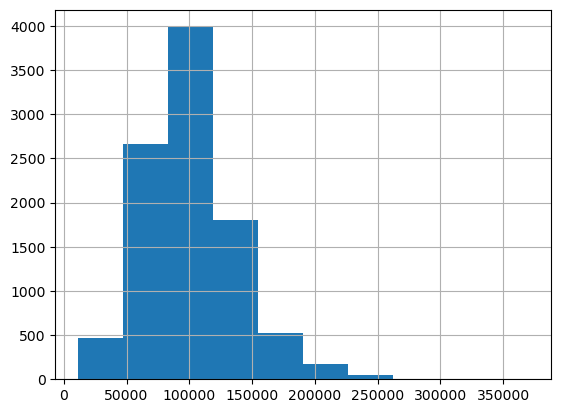

In [11]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
df['Total_Salary'].hist()

The Target variable distribution looks balanced. There are enough number of rows for the ML algorithms to learn. Hence we can go ahead!

## V. Basic Data Exploration

We'll evaluate the volume of data, the types of columns present in the data, to identify quantitative, categorical or qualitative columns.

This step will enable us to retain the columns we consider relevant, i.e. those that could affect our target variable, and then eliminate those deemed unnecessary for our study.



    * head() : This helps to see a few sample rows of the data
    * info() : This provides the summarized information of the data
    * describe() : This provides the descriptive statistical details of the data
    * nunique(): This helps us to identify if a column is categorical or continuous


In [12]:
# Display the 5 first rows
df.head()

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade,Total_Salary
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.000,0.00,0.0,M2,175873.000
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.360,0.00,0.0,M3,145613.360
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.000,0.00,0.0,M3,136970.000
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.694,0.00,2490.0,21,91922.694
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.000,456.68,6257.7,16,85661.380


In [13]:
# Display the 5 last rows
df.tail(5)

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade,Total_Salary
10285,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,158802.0000,0.0,0.00,N32,158802.0000
10287,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Director,F,215032.1000,0.0,0.00,NaN,215032.1000
10288,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Office of Zoning and Administrative Hea...,F,84365.5529,0.0,0.00,N18,84365.5529
10289,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Zoning and Administrative Hearings,F,98228.0000,0.0,1596.27,N21,99824.2700
10290,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Zoning and Administrative Hearings,F,177976.3100,0.0,0.00,N35,177976.3100


In [14]:
# Summary information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9674 entries, 0 to 10290
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department       9674 non-null   object 
 1   Department_Name  9674 non-null   object 
 2   Division         9674 non-null   object 
 3   Gender           9674 non-null   object 
 4   Base_Salary      9674 non-null   float64
 5   Overtime_Pay     9674 non-null   float64
 6   Longevity_Pay    9674 non-null   float64
 7   Grade            9649 non-null   object 
 8   Total_Salary     9674 non-null   float64
dtypes: float64(4), object(5)
memory usage: 755.8+ KB


In [15]:
# Descriptive statistical details of the data
df.describe(include='all')

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade,Total_Salary
count,9674,9674,9674,9674,9674.000000,9674.000000,9674.000000,9649,9674.000000
unique,42,42,627,2,NaN,NaN,NaN,98,NaN
top,POL,Department of Police,DOT 50 Transit Gaithersburg Ride On,M,NaN,NaN,NaN,T1,NaN
freq,1702,1702,352,5687,NaN,NaN,NaN,686,NaN
mean,NaN,NaN,NaN,NaN,90725.643578,8594.192753,1573.027926,NaN,100892.864258
std,NaN,NaN,NaN,NaN,30774.245561,16879.186881,3256.385047,NaN,37465.460941
min,NaN,NaN,NaN,NaN,11147.240000,0.000000,0.000000,NaN,11147.240000
25%,NaN,NaN,NaN,NaN,71147.363700,0.000000,0.000000,NaN,76624.287500
50%,NaN,NaN,NaN,NaN,87328.000000,518.325000,0.000000,NaN,97161.310000
75%,NaN,NaN,NaN,NaN,108084.000000,10237.242500,1334.992500,NaN,120333.000000


In [16]:
# Identify if a column is categorical or continuous
df.nunique()

Department           42
Department_Name      42
Division            627
Gender                2
Base_Salary        3470
Overtime_Pay       5566
Longevity_Pay      1113
Grade                98
Total_Salary       8275
dtype: int64

## VI. Basic Data Exploration Results

Following on from the basic exploration above, we'll make a brief report on each column and make a preliminary selection of the columns that will be useful for our study.

It's a preliminary selection, further study will be done and then a final list will be created.
Typically if the numbers of unique values are < 20 then the variable is likely to be a category otherwise continuous

    
   - **Department**: Qualitative. Rejected. This column has very high cardinality                 
   - **Department_Name**: Qualitative. Rejected. This column has very high cardinality
   - **Division**: Qualitative. Rejected. This column has very high cardinality
   - **Gender**: Categorical. Selected
   - **Base_Salary**: Continuous. Selected
   - **Overtime_Pay**: Continuos. Selected
   - **Longevity_Pay**: Continuous. Selected
   - **Grade**: Qualitative. Rejected
   - **Total_Salary**: Continue. Selected. This is our **Target** variable
 

## 1. Remove useless columns from the dataset

Based on the above report, we are going to drop 'Department', 'Department_Name', 'Division' columns from our dataset.

 ### Drop variables of no interest to us

In [17]:
df = df.drop(columns=['Department', 'Department_Name', 'Division', 'Grade'])

In [18]:
df.head(5)

,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Total_Salary
0,M,175873.000,0.00,0.0,175873.000
1,M,145613.360,0.00,0.0,145613.360
2,F,136970.000,0.00,0.0,136970.000
3,F,89432.694,0.00,2490.0,91922.694
4,F,78947.000,456.68,6257.7,85661.380


## 2. Visual Exploratory Data Analysis

    Categorical variables: Bar plot
    Continuous variables: Histogram

We are going to visualize the distribution of all the Categorical Predictor variables in the data using bar plots¶

Based on the Basic Data Exploration above, we have spotted one categorical predictors in the data

Categorical Predictors: "Genre"

We use bar charts to see how the data is distributed for that categorical column.

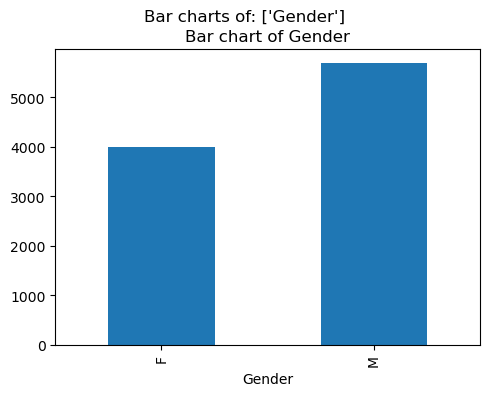

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def PlotBarCharts(inpData, colsToPlot):
    # Generating multiple subplots
    num_plots = len(colsToPlot)
    fig, subPlot = plt.subplots(nrows=1, ncols=num_plots, figsize=(5 * num_plots, 4))
    fig.suptitle('Bar charts of: ' + str(colsToPlot))

    # Ensure subPlot is an array even if there is only one subplot
    if num_plots == 1:
        subPlot = [subPlot]

    for colName, plotNumber in zip(colsToPlot, range(num_plots)):
        inpData.groupby(colName).size().plot(kind='bar', ax=subPlot[plotNumber])
        subPlot[plotNumber].set_title(f'Bar chart of {colName}')

    plt.tight_layout()
    plt.subplots_adjust(top=0.88)  
    plt.show()

PlotBarCharts(inpData=df, colsToPlot=["Gender"])

In this data, the categorical columns 'Gender' have satisfactory distribution for machine learning. The variable will be selected for further analysis.

In [20]:
df.columns

Index(['Gender', 'Base_Salary', 'Overtime_Pay', 'Longevity_Pay',
       'Total_Salary'],
      dtype='object')


### Visualize distribution of all the Continuous Predictor variables in the data using histograms

Based on the Basic Data Exploration, three continuous predictor variables were found:'Base_Salary', 'Overtime_Pay', 'Longevity_Pay'.

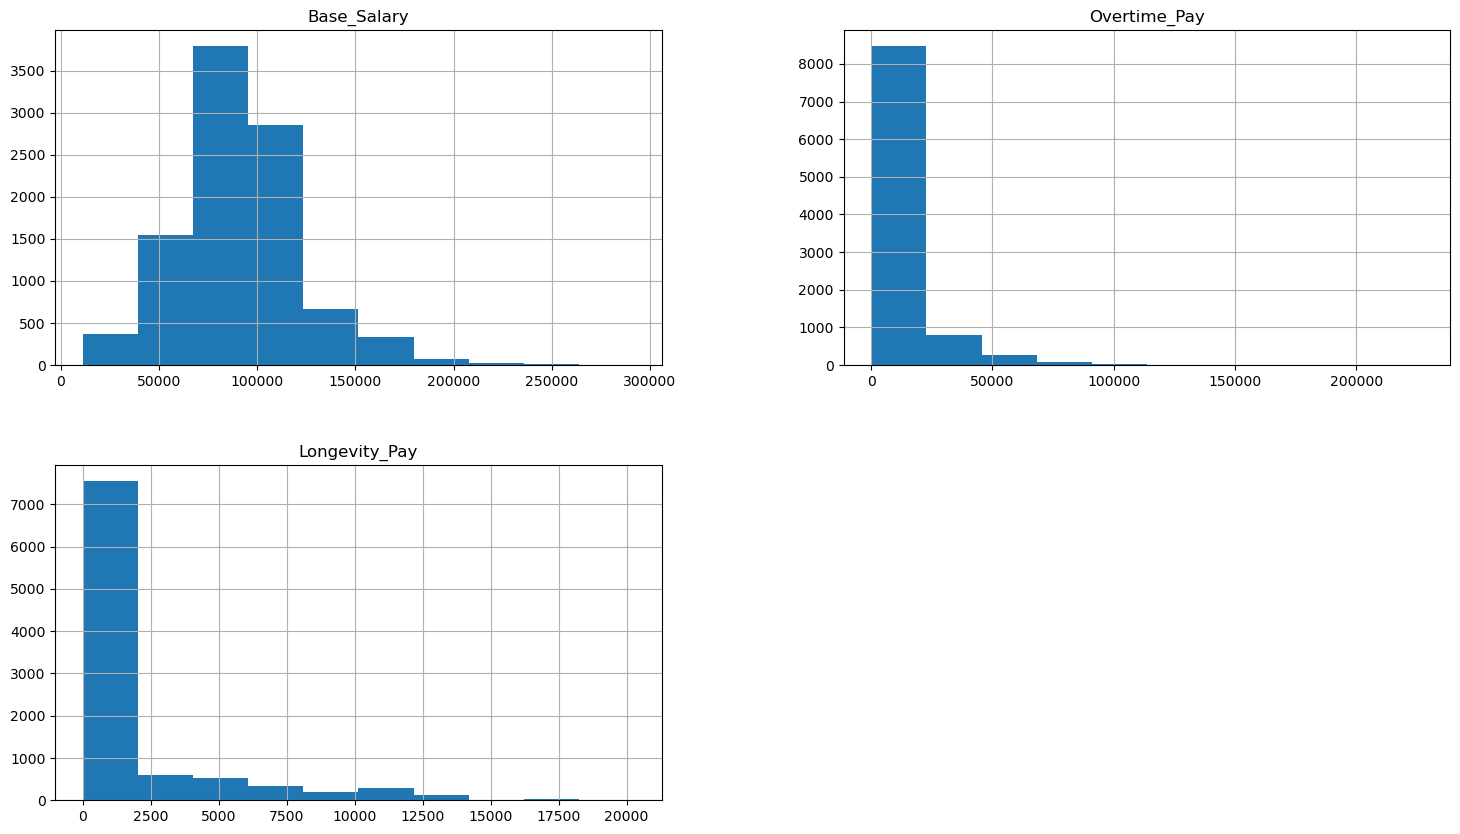

In [21]:
# Plotting histograms of multiple columns together
df.hist(['Base_Salary', 'Overtime_Pay', 'Longevity_Pay'], figsize=(18,10));

 ### Histogram Interpretation

Selected Continuous Variables:

- **Base_Salary** : Selected. The distribution is good  because the histogram is a bell curve.
- **Overtime_Pay**. Selected. The distribution is skewed on the right. Outliers seen beyond 50000, need to treat them.
- **Longevity_Pay**: Selected. The distribution is skewed on the right. Outliers seen beyond 2500, need to treat them.

### Outlier treatment

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.

- Option-1: Delete the outlier Records. Only if there are just few rows lost.
- Option-2: Impute the outlier values with a logical business value

Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

  ### - Treatment of 'Overtime_Pay' outliers

- ### Detect Outliers Using IQR

We are going to use statistical methods to identify outliers.

In [22]:
# Calculate quartiles and IQR
Q1 = df['Overtime_Pay'].quantile(0.25)
Q3 = df['Overtime_Pay'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound1 = Q1 - 1.5 * IQR
upper_bound1 = Q3 + 1.5 * IQR

# Identify outliers
outliers1 = df[(df['Overtime_Pay'] < lower_bound1) | (df['Overtime_Pay'] > upper_bound1)]
print("Identified outliers for Overtime_Pay:")
print(outliers1)

Identified outliers for Overtime_Pay:
      Gender  Base_Salary  Overtime_Pay  Longevity_Pay  Total_Salary
768        M   58751.0000      38750.41         954.72    98456.1300
779        M   57140.1884      35502.68           0.00    92642.8684
780        M   55178.5909      36867.03           0.00    92045.6209
791        F   52833.0000      25926.97           0.00    78759.9700
796        M   52333.0000      31094.06           0.00    83427.0600
...      ...          ...           ...            ...           ...
10004      M  111531.0000      26017.30        8403.09   145951.3900
10015      M   81408.0000      47933.83           0.00   129341.8300
10091      M  111531.0000      26058.87        5565.38   143155.2500
10122      M  101939.0000      80162.41        5344.94   187446.3500
10224      M   93986.0000      26121.90        7472.55   127580.4500

[1049 rows x 5 columns]


- ### Quantify Outliers

In [23]:
# Calculate initial row count
initial_row_count1 = df.shape[0]

# Calculate the number of outlier rows
outlier_count1 = outliers1.shape[0]

# Calculate the percentage of rows that are outliers
outlier_percentage1 = (outlier_count1 / initial_row_count1) * 100

print(f"Initial row count of Overtime_Pay: {initial_row_count1}")
print(f"Number of outlier rows of Overtime_Pay: {outlier_count1}")
print(f"Percentage of outlier rows of Overtime_Pay: {outlier_percentage1:.2f}%")

Initial row count of Overtime_Pay: 9674
Number of outlier rows of Overtime_Pay: 1049
Percentage of outlier rows of Overtime_Pay: 10.84%


  ### - Treatment of 'Longevity_Pay' outliers

- ### Detect Outliers Using IQR

We are going to use statistical methods to identify outliers.

In [24]:
# Calculate quartiles and IQR
Q1 = df['Longevity_Pay'].quantile(0.25)
Q3 = df['Longevity_Pay'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound2 = Q1 - 1.5 * IQR
upper_bound2 = Q3 + 1.5 * IQR

# Identify outliers
outliers2 = df[(df['Longevity_Pay'] < lower_bound2) | (df['Longevity_Pay'] > upper_bound2)]
print("Identified outliers for Longevity_Pay:")
print(outliers2)

Identified outliers for Longevity_Pay:
      Gender  Base_Salary  Overtime_Pay  Longevity_Pay  Total_Salary
4          F     78947.00        456.68        6257.70      85661.38
8          F    149464.15          0.00        9021.82     158485.97
21         M     61240.00         92.35        4827.40      66159.75
22         M     86103.00      23917.44        3665.64     113686.08
24         M     86103.00       3165.46        3665.65      92934.11
...      ...          ...           ...            ...           ...
10258      M     93986.00       2467.62        4454.99     100908.61
10263      M    134500.00          0.00        5747.80     140247.80
10268      M    134500.00          0.00        3574.41     138074.41
10278      M    167884.00          0.00        3594.90     171478.90
10279      F    134500.00          0.00        5747.80     140247.80

[1820 rows x 5 columns]


- ### Quantify Outliers

In [25]:
# Calculate initial row count
initial_row_count2 = df.shape[0]

# Calculate the number of outlier rows
outlier_count2 = outliers2.shape[0]

# Calculate the percentage of rows that are outliers
outlier_percentage2 = (outlier_count2 / initial_row_count2) * 100

print(f"Initial row count of Longevity_Pay: {initial_row_count2}")
print(f"Number of outlier rows of Longevity_Pay: {outlier_count2}")
print(f"Percentage of outlier rows of Longevity_Pay: {outlier_percentage2:.2f}%")

Initial row count of Longevity_Pay: 9674
Number of outlier rows of Longevity_Pay: 1820
Percentage of outlier rows of Longevity_Pay: 18.81%


**Observations of outliers results**:
- If the outliers proportion is below a certain threshold (5% Arbitrary threshold), we are going to remove them, else we will impute the outlier values with a logical business value.
- Percentage of outlier rows of Overtime_Pay column: 10.84% > 5%. We are going to impute with the nearest valid value.
- Percentage of outlier rows of Longevity_Pay column: 18.81% > 5%. We are going to impute with the nearest valid value.

- ### Imputaton of outlier of Overtime_Pay column 

In [26]:
# Finding nearest values to 50000 mark
df['Overtime_Pay'][df['Overtime_Pay']<50000].sort_values(ascending=False)

1749     49872.32
2717     49832.97
9574     49784.08
4852     49756.39
4717     49756.29
           ...   
5787         0.00
5783         0.00
5780         0.00
5779         0.00
10290        0.00
Name: Overtime_Pay, Length: 9348, dtype: float64

Above result shows the nearest logical value is 49872.32, hence, replacing any value above 50000 with it.

In [27]:
# Replacing outliers with nearest possibe value
df['Overtime_Pay'][df['Overtime_Pay']>49872.32] =49872.32

In [28]:
# Finding nearest values to 2500 mark
df['Longevity_Pay'][df['Longevity_Pay']<2500].sort_values(ascending=False)

3        2490.00
4326     2485.27
7230     2484.73
7        2452.94
4639     2452.00
          ...   
3164        0.00
3163        0.00
3162        0.00
3161        0.00
10290       0.00
Name: Longevity_Pay, Length: 7647, dtype: float64

Above result shows the nearest logical value is 2.490000e+03, hence, replacing any value above 2500 with it.

In [29]:
# Replacing outliers with nearest possibe value
df['Longevity_Pay'][df['Longevity_Pay']>2.490000e+03] =2.490000e+03

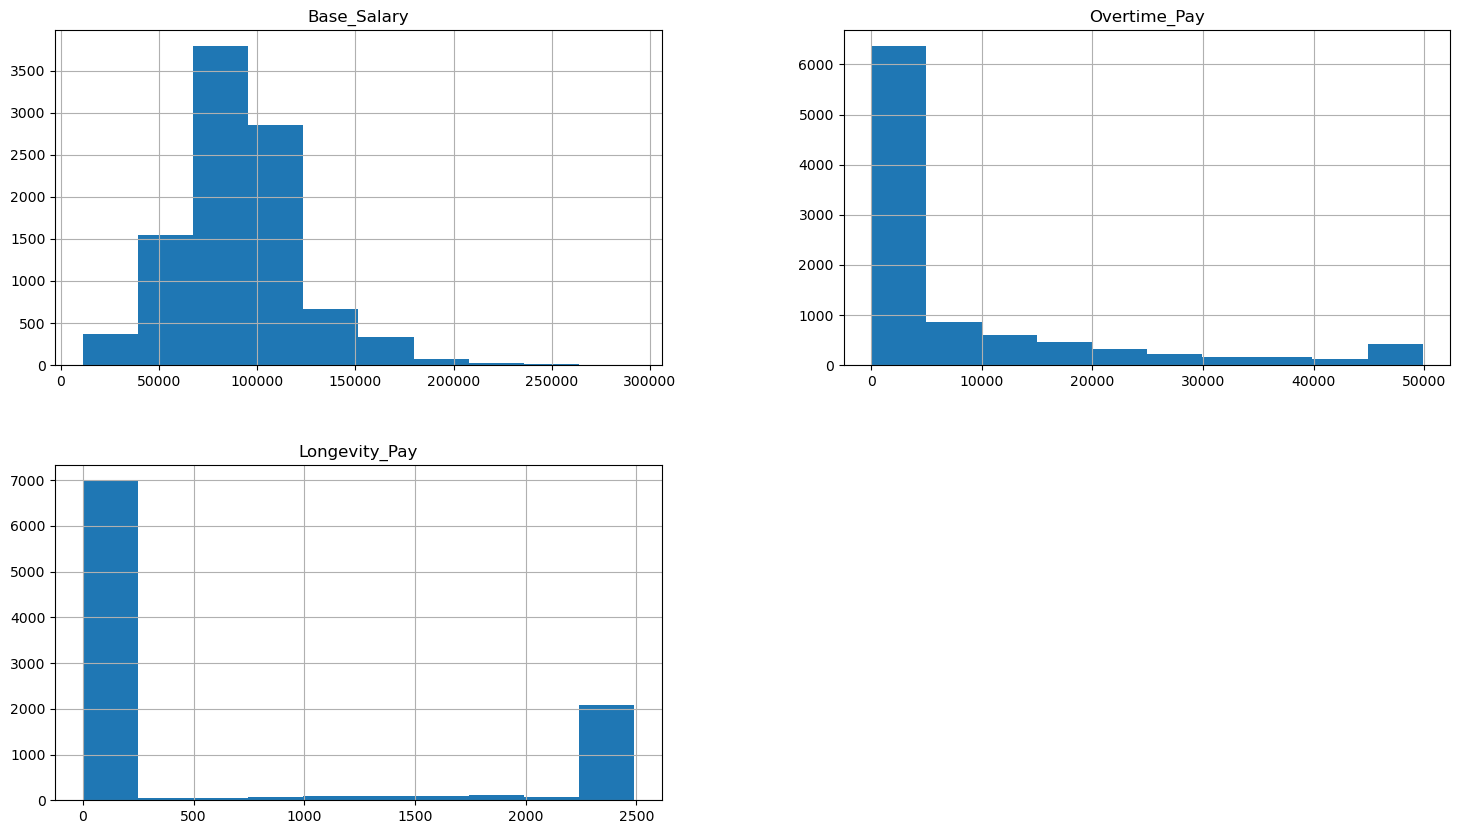

In [30]:
# Plotting histograms of multiple columns together
df.hist(['Base_Salary', 'Overtime_Pay', 'Longevity_Pay'], figsize=(18,10));

In [31]:
# Finding nearest values to 10000 mark
df['Overtime_Pay'][df['Overtime_Pay']<10000].sort_values(ascending=False)

9961     9990.41
2228     9973.27
4864     9958.68
7990     9955.56
2243     9953.22
          ...   
5538        0.00
5537        0.00
5536        0.00
5535        0.00
10290       0.00
Name: Overtime_Pay, Length: 7223, dtype: float64

Above result shows the nearest logical value is 9990.41, hence, replacing any value above 10000 with it.

In [32]:
# Replacing outliers with nearest possibe value
df['Overtime_Pay'][df['Overtime_Pay']>9990.41] =9990.41

In [33]:
# Finding nearest values to 500 mark
df['Longevity_Pay'][df['Longevity_Pay']<500].sort_values(ascending=False)

1964     493.45
8348     481.68
8332     473.32
6828     469.96
9705     464.46
          ...  
3045       0.00
3044       0.00
3043       0.00
3042       0.00
10290      0.00
Name: Longevity_Pay, Length: 7018, dtype: float64

Above result shows the nearest logical value is 493.45, hence, replacing any value above 500 with it.

In [34]:
# Replacing outliers with nearest possibe value
df['Longevity_Pay'][df['Longevity_Pay']>493.45] =493.45

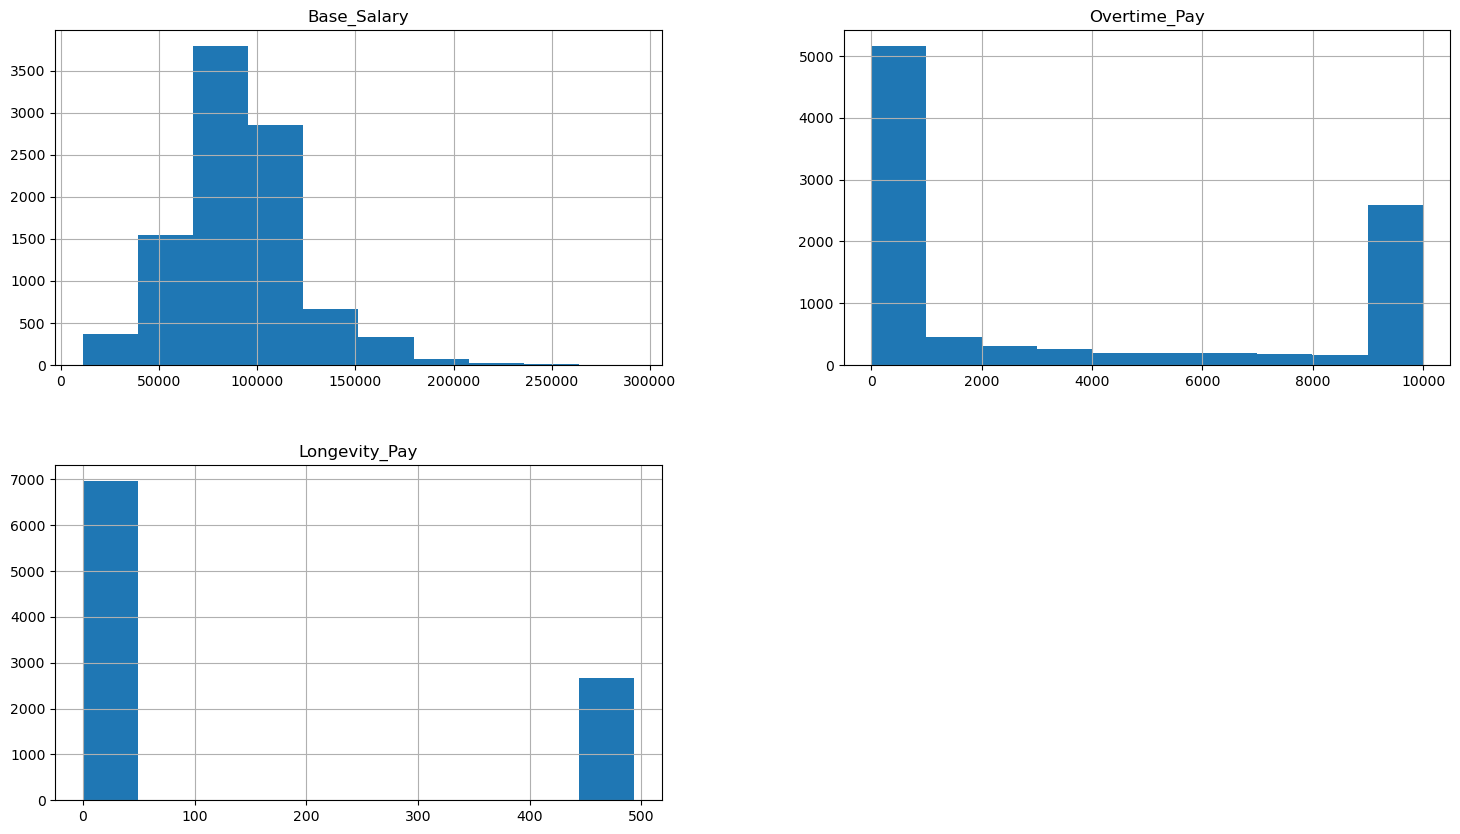

In [35]:
# Plotting histograms of multiple columns together
df.hist(['Base_Salary', 'Overtime_Pay', 'Longevity_Pay'], figsize=(18,10));

**Observation** :
We always have outliers in our dataset. To do this, we are going to choose Machine Learning models that are robust to outliers. 

In [36]:
# Check the missing values
df.isnull().sum()

Gender           0
Base_Salary      0
Overtime_Pay     0
Longevity_Pay    0
Total_Salary     0
dtype: int64

No missing values in our dataset

## VII. Feature Selection

We are finally choose the best Features which are correlated to the Target variable. We can do that directly by measuring the correlation values or ANOVA/Chi-Square tests. But we are going to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

We list below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

### Visual exploration of relationship between variables
Continuous Vs Continuous ---- Scatter Plot

### Statistical measurement of relationship strength between variables
Continuous Vs Continuous ---- Correlation matrix

In our case study the Target variable is Continuous, hence the scenario which will be present is: 

Continuous Target Variable Vs Continuous Predictor


### 1. Relationship exploration: Continuous Vs Continuous -- Scatter Charts
Our Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

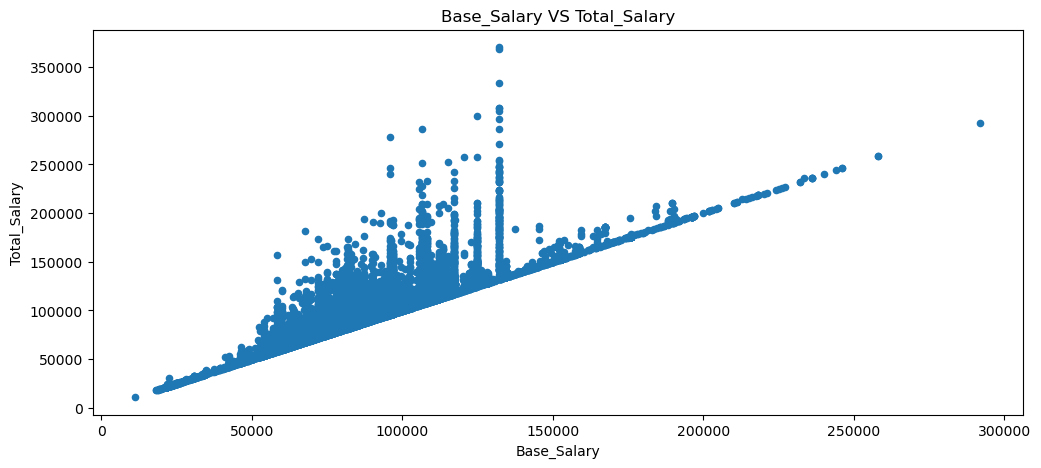

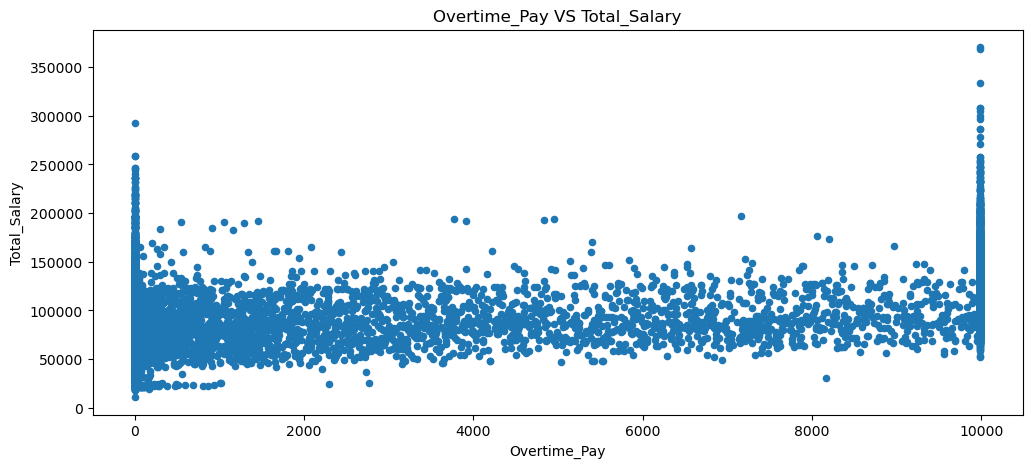

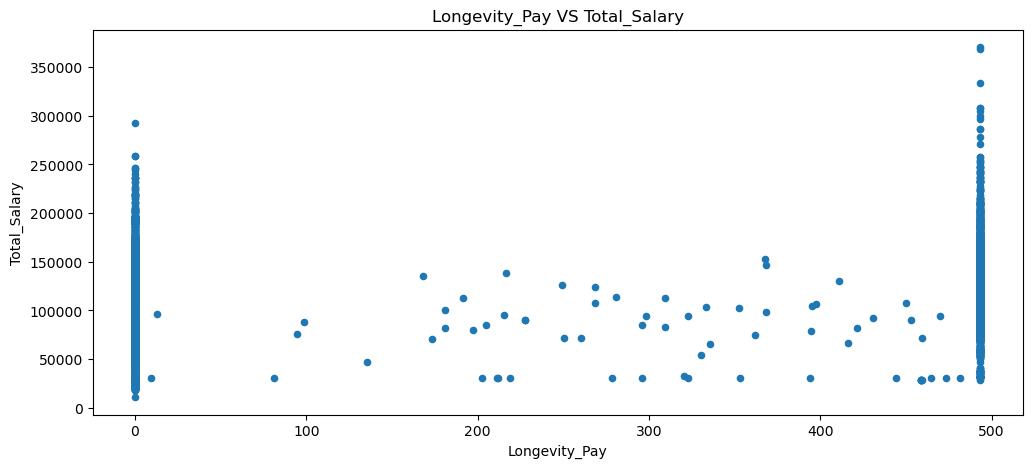

In [37]:
ContinuousCol=['Base_Salary', 'Overtime_Pay', 'Longevity_Pay']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCol:
    df.plot.scatter(x=predictor, y='Total_Salary', figsize=(12,5), title=predictor+" VS "+ 'Total_Salary')

### Scatter charts interpretation

We'll try to see whether or not there's a visible trend between the variables.

- The trend is increase if the two variables are positively correlated. In other words, they are directly proportional to each other: if one value increases, the other also increases. Good for ML
- The trend is decrease if the two variables are negatively correlated. In other words, they are inversely proportional to each other: if one value increases, the other decreases. This is also good for ML
- There is no trend if the two variables show no clear tendency to increase or decrease. This means that there is no correlation between the variables. The predictor can therefore not be used for ML.

- These graphs give us a clear idea of the predictor's usefulness. We'll confirm this by examining the correlation value in the rest of our study.

- **For the moment, we can say: only the variables 'Base_Salary' and 'Total_Salary' are good for our model, so for our model we will use only those two variables**. 

### 2. Correlation matrix using a heatmap
- Also we can use a heatmap to see the Correlation matrix

               Base_Salary  Overtime_Pay  Longevity_Pay  Total_Salary
Base_Salary       1.000000     -0.021370       0.212088      0.880355
Overtime_Pay     -0.021370      1.000000       0.079249      0.311126
Longevity_Pay     0.212088      0.079249       1.000000      0.309109
Total_Salary      0.880355      0.311126       0.309109      1.000000


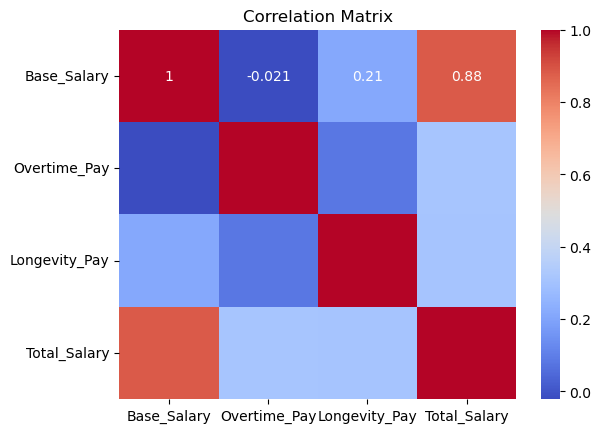

In [38]:
# Calculate the correlation matrix
correlation_matrix = df[['Base_Salary', 'Overtime_Pay', 'Longevity_Pay', 'Total_Salary']].corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 3. Statistical Feature Selection (Continuous Vs Continuous) using Correlation value
The Pearson correlation coefficient (also known as the “product-moment correlation coefficient”) is a measure of the linear association between two variables X and Y. It has a value between -1 and 1 where:

- -1 indicates a perfectly negative linear correlation between two variables
- 0 indicates no linear correlation between two variables
- 1 indicates a perfectly positive linear correlation between two variables
(Zach, 2019)

In [39]:
# Calculating correlation matrix
ContinuousCol=['Total_Salary', 'Base_Salary', 'Overtime_Pay', 'Longevity_Pay']

# Creating the correlation matrix
CorrelationData=df[ContinuousCol].corr()
CorrelationData

,Total_Salary,Base_Salary,Overtime_Pay,Longevity_Pay
Total_Salary,1.000000,0.880355,0.311126,0.309109
Base_Salary,0.880355,1.000000,-0.021370,0.212088
Overtime_Pay,0.311126,-0.021370,1.000000,0.079249
Longevity_Pay,0.309109,0.212088,0.079249,1.000000


In [40]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected like in this case
CorrelationData['Total_Salary'][abs(CorrelationData['Total_Salary']) > 0.2 ]

Total_Salary     1.000000
Base_Salary      0.880355
Overtime_Pay     0.311126
Longevity_Pay    0.309109
Name: Total_Salary, dtype: float64

### 4. Final selected Continuous columns:
- The number of 'Base_Salary' (0.880355) is close to 1, which indicates that there is a strong positive linear relationship between our variables 'Base-Salary' and 'Total_Salary'. This confirms the relationship that we saw in the scatter chart and heatmap above.

##  VIII. Choose and Train a Machine Learning Model

- We have identified outliers in our dataset that we have tried to address. Indeed, outliers can have a significant impact on the performance of machine learning models, particularly those that are sensitive to extreme values. In order to have a good model, we have chosen four machine learning regression models that are robust to outliers.
- Linear Regression
- Random Forest
- Decision Tree
- Support Vector Regression

### 1. Linear Regression Model

Linear Regression - Mean Squared Error (MSE): 311449707.2000423
Linear Regression - R^2 Score: 0.7753464400259423
           Actual      Predicted
9796  105520.5800  108963.190243
490    78264.8519   87314.524233
1179  112477.2100   76100.291095
8585   80054.0354   88218.820691
5411  103393.8000  114472.170695
9668   76633.9200   81874.836285
6159   76741.9450   85334.839747
8511  157216.5200  172218.877239
2367  122842.0000  135357.740907
7994   79326.2400   88664.886452


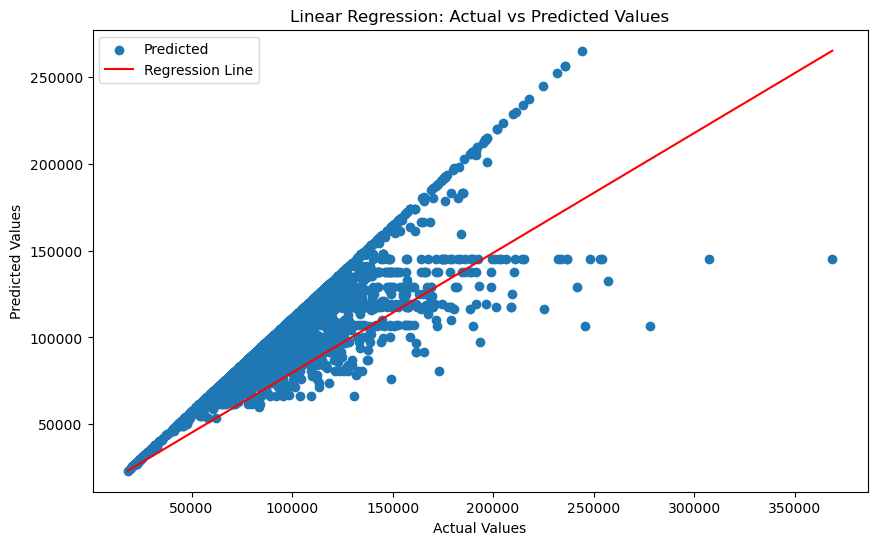

In [55]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the predictor variables (X) and the target variable (y)
X = df[['Base_Salary']] 
y = df['Total_Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Linear Regression - Mean Squared Error (MSE): {mse_linear}')
print(f'Linear Regression - R^2 Score: {r2_linear}')

# Compare actual vs predicted values
comparison_linear_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linear})
print(comparison_linear_df.head(10))

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))  # Resize the figure
plt.scatter(y_test, y_pred_linear, label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_pred_linear), max(y_pred_linear)], color='red', label='Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted Values')
plt.legend()

### 2. Random Forest

Random Forest - Mean Squared Error (MSE): 183757542.52614275
Random Forest - R^2 Score: 0.8674528017004453
           Actual      Predicted
9796  105520.5800  104532.872149
490    78264.8519  109005.223958
1179  112477.2100  115594.772784
8585   80054.0354   80974.315563
5411  103393.8000  114515.978361
9668   76633.9200   81953.744328
6159   76741.9450   76391.222836
8511  157216.5200  162809.840076
2367  122842.0000  127993.185179
7994   79326.2400   94323.361759


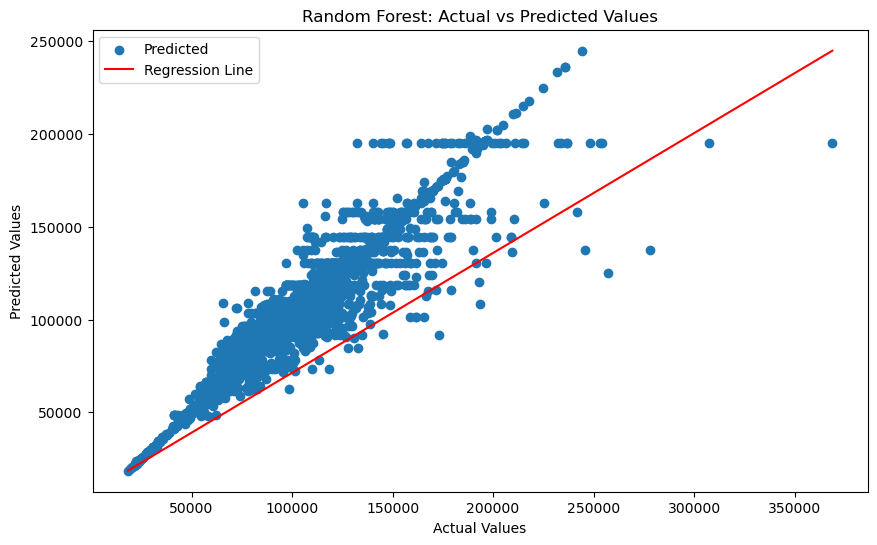

In [56]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - Mean Squared Error (MSE): {mse_rf}')
print(f'Random Forest - R^2 Score: {r2_rf}')

# Compare actual vs predicted values
comparison_rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
print(comparison_rf_df.head(10))

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))  # Resize the figure
plt.scatter(y_test, y_pred_rf, label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_pred_rf), max(y_pred_rf)], color='red', label='Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted Values')
plt.legend()


### 3. Decision Tree Regression

Decision Tree - Mean Squared Error (MSE): 188144218.496445
Decision Tree - R^2 Score: 0.8642886235028139
           Actual      Predicted
9796  105520.5800  104495.804525
490    78264.8519  125615.427800
1179  112477.2100  113991.941250
8585   80054.0354   80654.124250
5411  103393.8000  116277.445000
9668   76633.9200   82247.412000
6159   76741.9450   76192.570200
8511  157216.5200  163811.820000
2367  122842.0000  127933.098856
7994   79326.2400   94945.620000


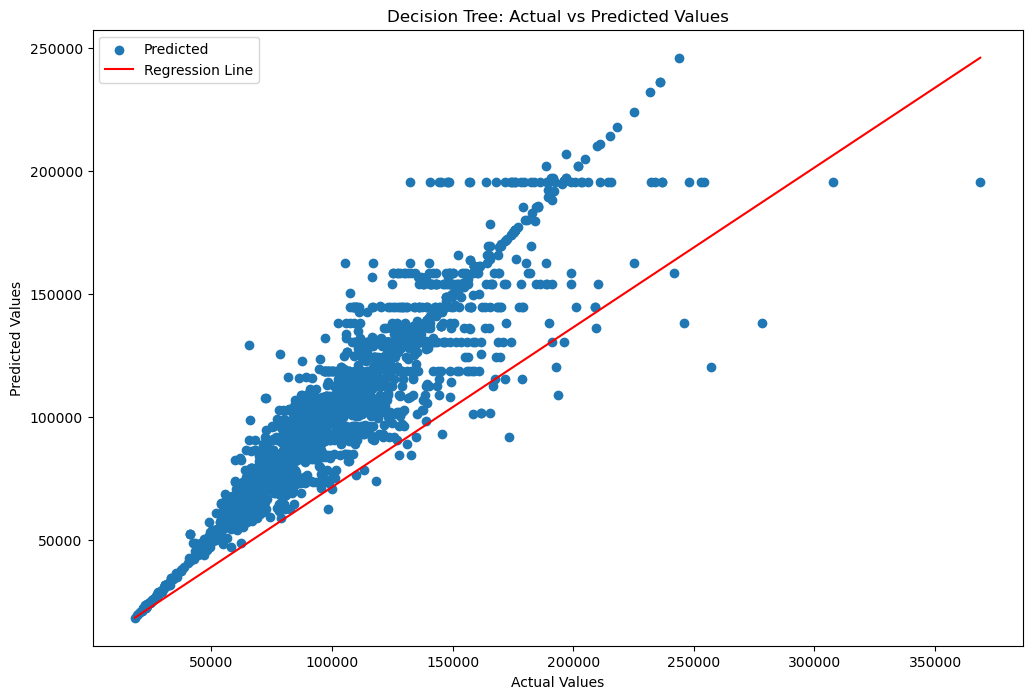

In [57]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Train the Decision Tree Regressor model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Decision Tree - Mean Squared Error (MSE): {mse_tree}')
print(f'Decision Tree - R^2 Score: {r2_tree}')

# Compare actual vs predicted values
comparison_tree_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_tree})
print(comparison_tree_df.head(10))

# Visualize actual vs predicted values
plt.figure(figsize=(12, 8))  # Resize the figure
plt.scatter(y_test, y_pred_tree, label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_pred_tree), max(y_pred_tree)], color='red', label='Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.legend()

### 4. Support Vector Regression (SVR)

SVR - Mean Squared Error (MSE): 1331270371.2010071
SVR - R^2 Score: 0.03973379565196511
           Actual     Predicted
9796  105520.5800  98117.138973
490    78264.8519  96222.492015
1179  112477.2100  95676.245650
8585   80054.0354  96287.089788
5411  103393.8000  98534.545841
9668   76633.9200  95895.447335
6159   76741.9450  96090.797386
8511  157216.5200  98082.790487
2367  122842.0000  99099.987481
7994   79326.2400  96319.923141


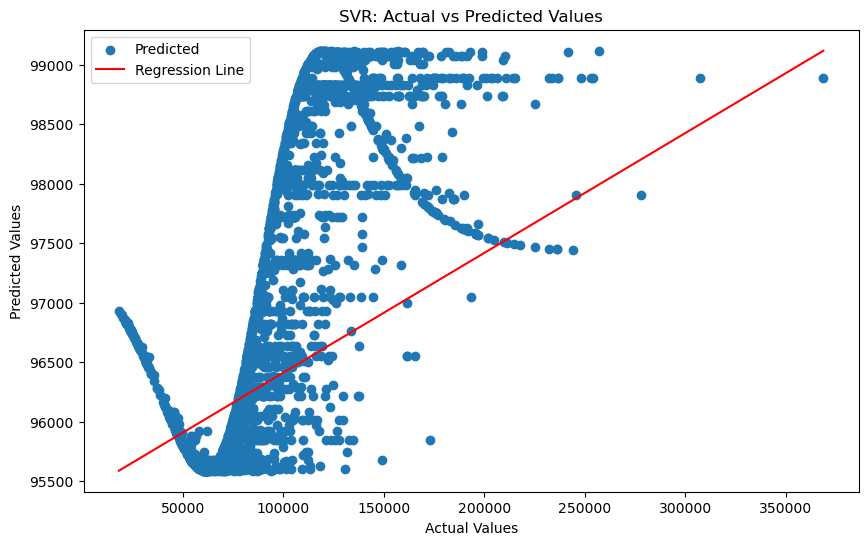

In [58]:
from sklearn.svm import SVR

# Train the Support Vector Regressor model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'SVR - Mean Squared Error (MSE): {mse_svr}')
print(f'SVR - R^2 Score: {r2_svr}')

# Compare actual vs predicted values
comparison_svr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svr})
print(comparison_svr_df.head(10))

# Visualize actual vs predicted valuest
plt.figure(figsize=(10, 6))  # Resize the figure
plt.scatter(y_test, y_pred_svr, label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_pred_svr), max(y_pred_svr)], color='red', label='Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR: Actual vs Predicted Values')
plt.legend()

### 5. Complete Comparison of the four models

Decision Tree - Mean Squared Error (MSE): 188144218.496445, R^2 Score: 0.8642886235028139
Random Forest - Mean Squared Error (MSE): 183757542.52614275, R^2 Score: 0.8674528017004453
SVR - Mean Squared Error (MSE): 1331270371.2010071, R^2 Score: 0.03973379565196511
Linear Regression - Mean Squared Error (MSE): 311449707.2000423, R^2 Score: 0.7753464400259423
           Actual  Predicted_Tree   Predicted_RF  Predicted_SVR  \
9796  105520.5800   104495.804525  104532.872149   98117.138973   
490    78264.8519   125615.427800  109005.223958   96222.492015   
1179  112477.2100   113991.941250  115594.772784   95676.245650   
8585   80054.0354    80654.124250   80974.315563   96287.089788   
5411  103393.8000   116277.445000  114515.978361   98534.545841   
9668   76633.9200    82247.412000   81953.744328   95895.447335   
6159   76741.9450    76192.570200   76391.222836   96090.797386   
8511  157216.5200   163811.820000  162809.840076   98082.790487   
2367  122842.0000   127933.098856  12

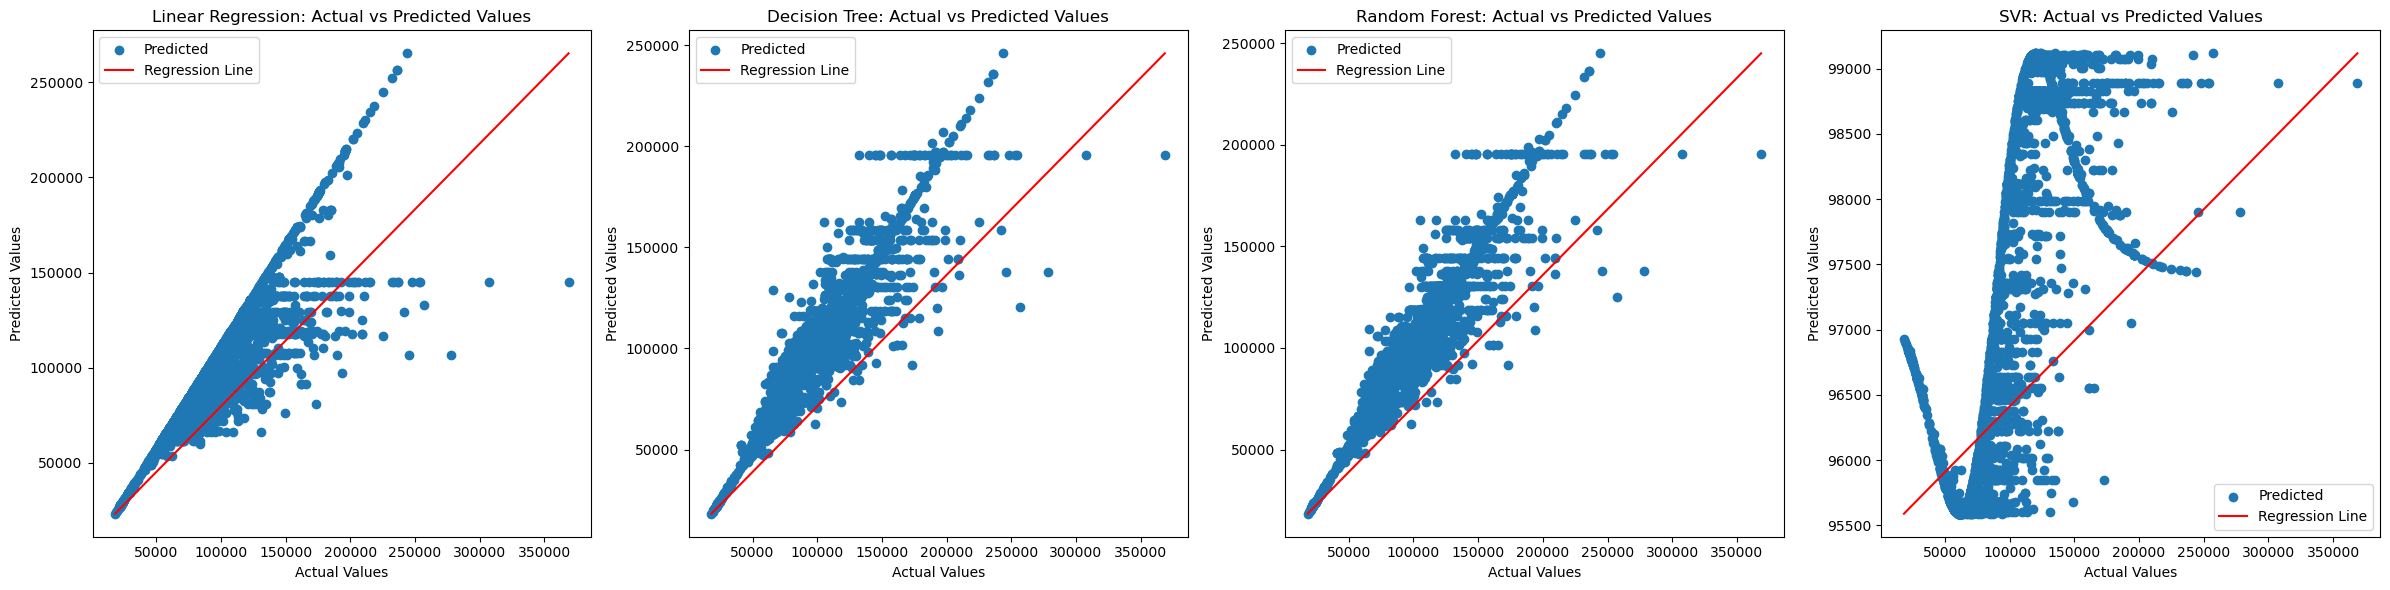

In [59]:
# Print the evaluation metrics for each model
print(f'Decision Tree - Mean Squared Error (MSE): {mse_tree}, R^2 Score: {r2_tree}')
print(f'Random Forest - Mean Squared Error (MSE): {mse_rf}, R^2 Score: {r2_rf}')
print(f'SVR - Mean Squared Error (MSE): {mse_svr}, R^2 Score: {r2_svr}')
print(f'Linear Regression - Mean Squared Error (MSE): {mse_linear}, R^2 Score: {r2_linear}')

# Compare actual vs predicted values for each model
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted_Tree': y_pred_tree,
    'Predicted_RF': y_pred_rf,
    'Predicted_SVR': y_pred_svr,
    'Predicted_Linear': y_pred_linear
})
print(comparison_df.head(10))

# Visualize actual vs predicted values for each model
plt.figure(figsize=(24, 6))


# Linear Regression plot
plt.subplot(1, 4, 1)
plt.scatter(y_test, y_pred_linear, label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_pred_linear), max(y_pred_linear)], color='red', label='Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted Values')
plt.legend()

# Decision Tree plot
plt.subplot(1, 4, 2)
plt.scatter(y_test, y_pred_tree, label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_pred_tree), max(y_pred_tree)], color='red', label='Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.legend()

# Random Forest plot
plt.subplot(1, 4, 3)
plt.scatter(y_test, y_pred_rf, label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_pred_rf), max(y_pred_rf)], color='red', label='Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted Values')
plt.legend()

# SVR plot
plt.subplot(1, 4, 4)
plt.scatter(y_test, y_pred_svr, label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_pred_svr), max(y_pred_svr)], color='red', label='Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR: Actual vs Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()

### 6. Visualize actual vs predicted values with Residual plot

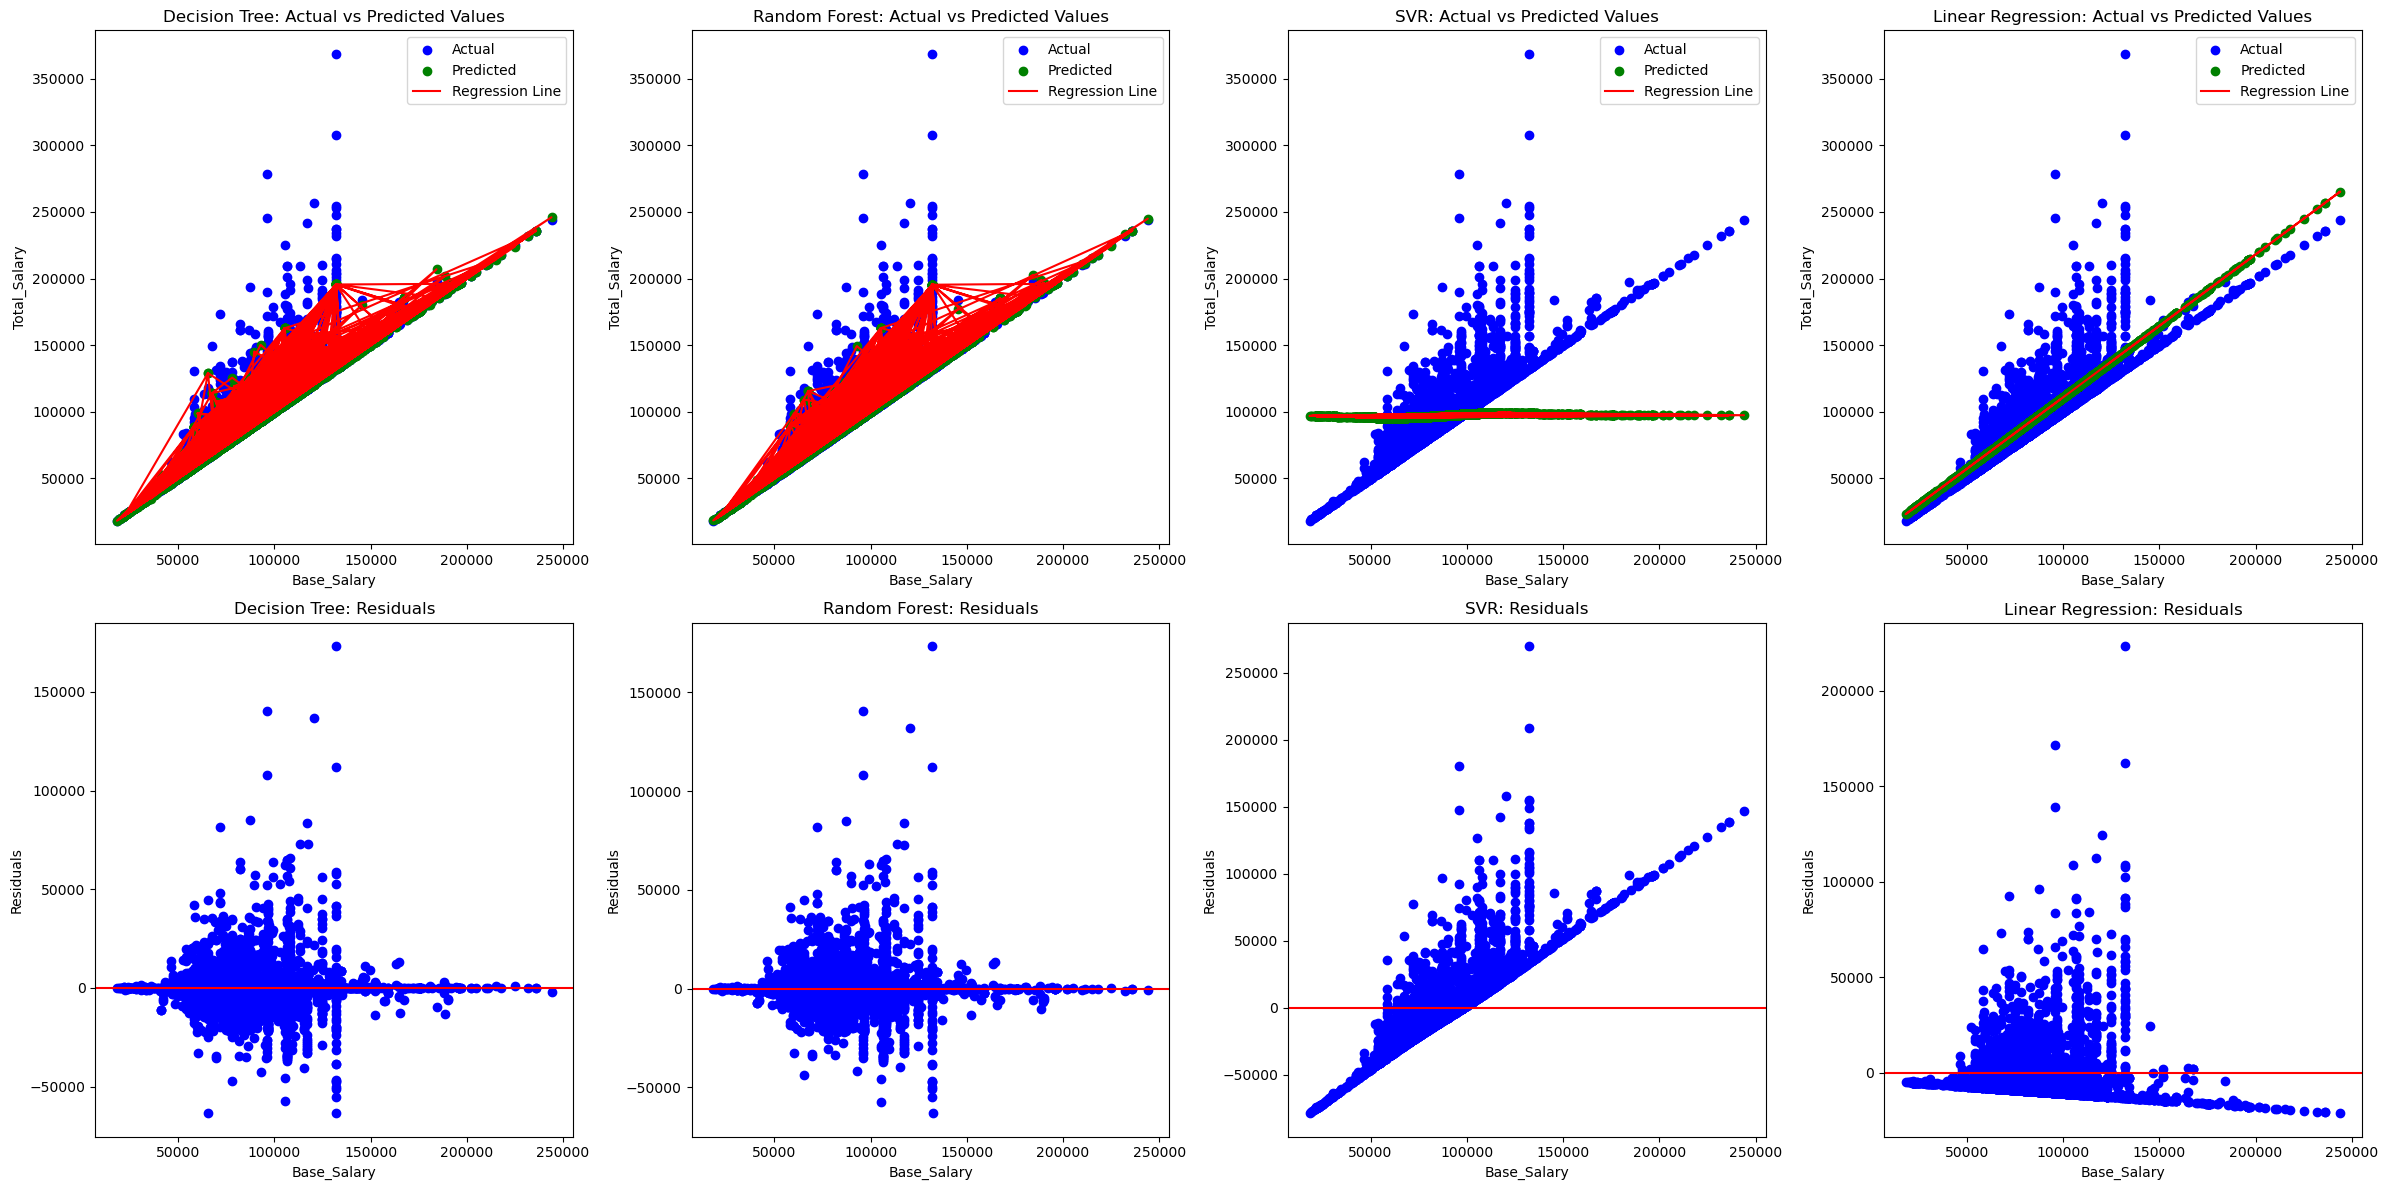

In [65]:
# Visualize actual vs predicted values for each model with regression lines
plt.figure(figsize=(24, 12))

# Decision Tree plot
plt.subplot(2, 4, 1)
plt.scatter(X_test, y_test, label='Actual', color='blue')
plt.scatter(X_test, y_pred_tree, label='Predicted', color='green')
plt.plot(X_test, y_pred_tree, color='red', label='Regression Line')
plt.xlabel('Base_Salary')
plt.ylabel('Total_Salary')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.legend()

# Random Forest plot
plt.subplot(2, 4, 2)
plt.scatter(X_test, y_test, label='Actual', color='blue')
plt.scatter(X_test, y_pred_rf, label='Predicted', color='green')
plt.plot(X_test, y_pred_rf, color='red', label='Regression Line')
plt.xlabel('Base_Salary')
plt.ylabel('Total_Salary')
plt.title('Random Forest: Actual vs Predicted Values')
plt.legend()

# SVR plot
plt.subplot(2, 4, 3)
plt.scatter(X_test, y_test, label='Actual', color='blue')
plt.scatter(X_test, y_pred_svr, label='Predicted', color='green')
plt.plot(X_test, y_pred_svr, color='red', label='Regression Line')
plt.xlabel('Base_Salary')
plt.ylabel('Total_Salary')
plt.title('SVR: Actual vs Predicted Values')
plt.legend()

# Linear Regression plot
plt.subplot(2, 4, 4)
plt.scatter(X_test, y_test, label='Actual', color='blue')
plt.scatter(X_test, y_pred_linear, label='Predicted', color='green')
plt.plot(X_test, y_pred_linear, color='red', label='Regression Line')
plt.xlabel('Base_Salary')
plt.ylabel('Total_Salary')
plt.title('Linear Regression: Actual vs Predicted Values')
plt.legend()

# Residual plots
plt.subplot(2, 4, 5)
plt.scatter(X_test, y_test - y_pred_tree, color='blue')
plt.axhline(y=0, color='red', linestyle='-')
plt.xlabel('Base_Salary')
plt.ylabel('Residuals')
plt.title('Decision Tree: Residuals')

plt.subplot(2, 4, 6)
plt.scatter(X_test, y_test - y_pred_rf, color='blue')
plt.axhline(y=0, color='red', linestyle='-')
plt.xlabel('Base_Salary')
plt.ylabel('Residuals')
plt.title('Random Forest: Residuals')

plt.subplot(2, 4, 7)
plt.scatter(X_test, y_test - y_pred_svr, color='blue')
plt.axhline(y=0, color='red', linestyle='-')
plt.xlabel('Base_Salary')
plt.ylabel('Residuals')
plt.title('SVR: Residuals')

plt.subplot(2, 4, 8)
plt.scatter(X_test, y_test - y_pred_linear, color='blue')
plt.axhline(y=0, color='red', linestyle='-')
plt.xlabel('Base_Salary')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residuals')

plt.tight_layout()
plt.show()


### 7. Choice of the best Model
- Compare the MSE and R^2 scores of the three models.
- The model with the lowest MSE and the highest R^2 score is generally considered the best.
- Additionally, visualize the scatter plots to see which model's predictions align more closely with the actual values.

**Our choice**:
- The Random Forest Model appears the best. It has the lowest MSE: 183757542.52614275 and the highest R^2 Score: 86.74%   

## References

Zach (2019). Pearson Correlation Coefficient. [online] Statology. Available at: https://www.statology.org/pearson-correlation-coefficient/.